In [2]:
import os
import numpy as np
import nibabel as nib

In [3]:
def match_orientation(img: np.ndarray) -> np.ndarray:
    """niftyの向きをdicomの向きに合わせる.
    Args:
        img (numpy.ndarray): 読み込んで、npに変換しただけのnifty画像.
    Reference:
        https://www.kaggle.com/code/parhammostame/construct-3d-arrays-from-dcm-nii-3-view-angles
    """
    img = np.transpose(img, [1, 0, 2])
    img = np.rot90(img, 1, (1,2))
    img = img[::-1,:,:]
    img = np.transpose(img, [1, 0, 2])
    return img

def load_mask_from_nifty(path: str)-> np.ndarray:
    """niftyファイルからマスクを読み込む."""
    mask = nib.load(path).get_fdata()
    mask = np.array(mask)
    mask = match_orientation(mask)
    return mask

def crop_region(img: np.ndarray, mask: np.ndarray, margin: int = 0) -> np.ndarray:
    """マスクされた領域を切り出す."""
    if margin > 0:
        mask = np.pad(mask, margin, mode="constant", constant_values=0)
    mask = np.where(mask > 0, 1, 0)
    x, y, z = np.where(mask > 0)
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    z_min, z_max = z.min(), z.max()
    if margin > 0:
        x_min = max(x_min - margin, 0)
        x_max = min(x_max + margin, mask.shape[0])
        y_min = max(y_min - margin, 0)
        y_max = min(y_max + margin, mask.shape[1])
        z_min = max(z_min - margin, 0)
        z_max = min(z_max + margin, mask.shape[2])
    return img[x_min:x_max, y_min:y_max, z_min:z_max], mask[x_min:x_max, y_min:y_max, z_min:z_max]

In [4]:
id = 94
ct_dir = f"/mnt/TransProgver/HU/{id}/RT1/RT1.nii"
mask_path = f"/home/takuro/work/Lung-Body-Detect/output/{id}/RT1/body_trunc.nii.gz"

In [5]:
ct = load_mask_from_nifty(ct_dir)
mask = load_mask_from_nifty(mask_path)

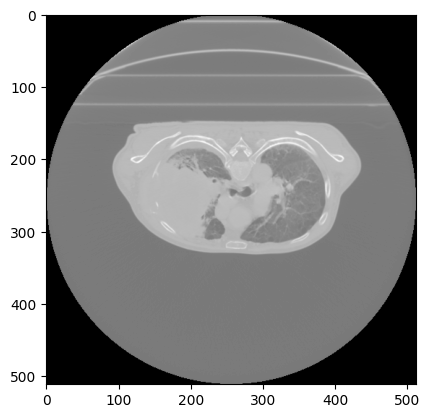

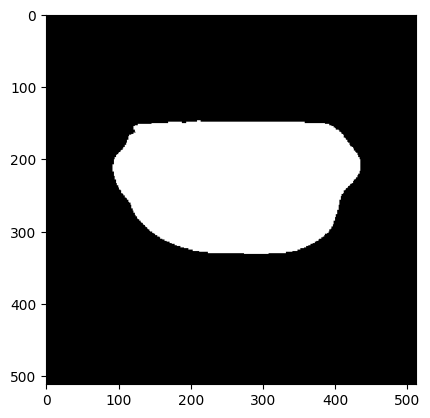

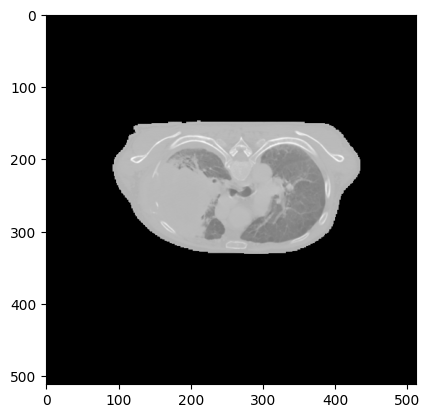

In [7]:
import matplotlib.pyplot as plt
id = 60
plt.imshow(ct[id], cmap="gray")
plt.show()
plt.imshow(mask[id], cmap="gray")
plt.show()
data = ct*mask
data[mask==0]=-3024
plt.imshow(data[id], cmap="gray")
plt.show()